In [1]:
import thermalutil as tu
import pandas as pd
pd.set_option('display.expand_frame_repr', False)
import numpy as np
import matplotlib.pyplot as plt  # Needed for clabel
from matplotlib.path import Path
import pickle as pkl
import cv2

## Fixed pwm analysis

### Configuration

In [2]:
dt_24 = {
    'square': '2025-09-25T15:26:20Z',
    #'square': '2025-09-25T15:16:20Z', # earlier run
    'gauss': '2025-09-25T15:37:30Z',
    'slope': '2025-09-25T15:56:00Z'
}

dt_13 = {
    'square': '2025-09-26T08:27:30Z',
    'gauss': '2025-09-26T08:46:00Z',
    'slope': '2025-09-26T09:46:30Z'
}

### Main code

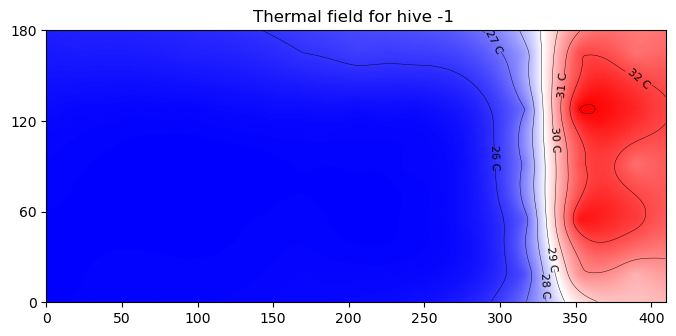

In [12]:
data_path = "data/2025-09-26-15-54_influxdb_data.csv"

df = pd.read_csv(data_path).iloc[:, 1:]
df.drop(columns=['_start', '_stop', 'geo_loc', 'phys_loc', 'hive_num', 'rpi_num', 'serial_id', 'result'], inplace=True)
df.set_index('_time', inplace=True)
temp_df = df[df['_measurement']=='tmp']
pwr_df = df[df['_measurement']=='pwr']

df_24_square = temp_df.loc[dt_24['square']]
df_24_gauss = temp_df.loc[dt_24['gauss']]
df_24_slope = temp_df.loc[dt_24['slope']]

# Order them based on _field
df_24_square = df_24_square.sort_values(by=['_field'])
df_24_gauss = df_24_gauss.sort_values(by=['_field'])
df_24_slope = df_24_slope.sort_values(by=['_field'])

square_24 = df_24_square['_value'].to_numpy()
tf = tu.ThermalFrame(square_24)
fig, ax = plt.subplots(figsize=(8, 6))
contours = np.arange(10, 50, 1)
tf.plot_thermal_field(ax=ax,contours=contours, annotate_contours=True)
plt.show()


## Other data analysis

Previewing thermal data:
Max temp at 132, 128 for row 0 [tmax = 26.70034128045256 °C]
Max temp at 53, 93 for row 10000 [tmax = 27.242808896331603 °C]
Max temp at 132, 128 for row 30000 [tmax = 31.226127857647295 °C]
Max temp at 205, 56 for row 70000 [tmax = 32.245175252810455 °C]
Max temp at 206, 55 for row 76300 [tmax = 28.18442337526227 °C]
Max temp at 279, 91 for row 100000 [tmax = 30.09910330127352 °C]


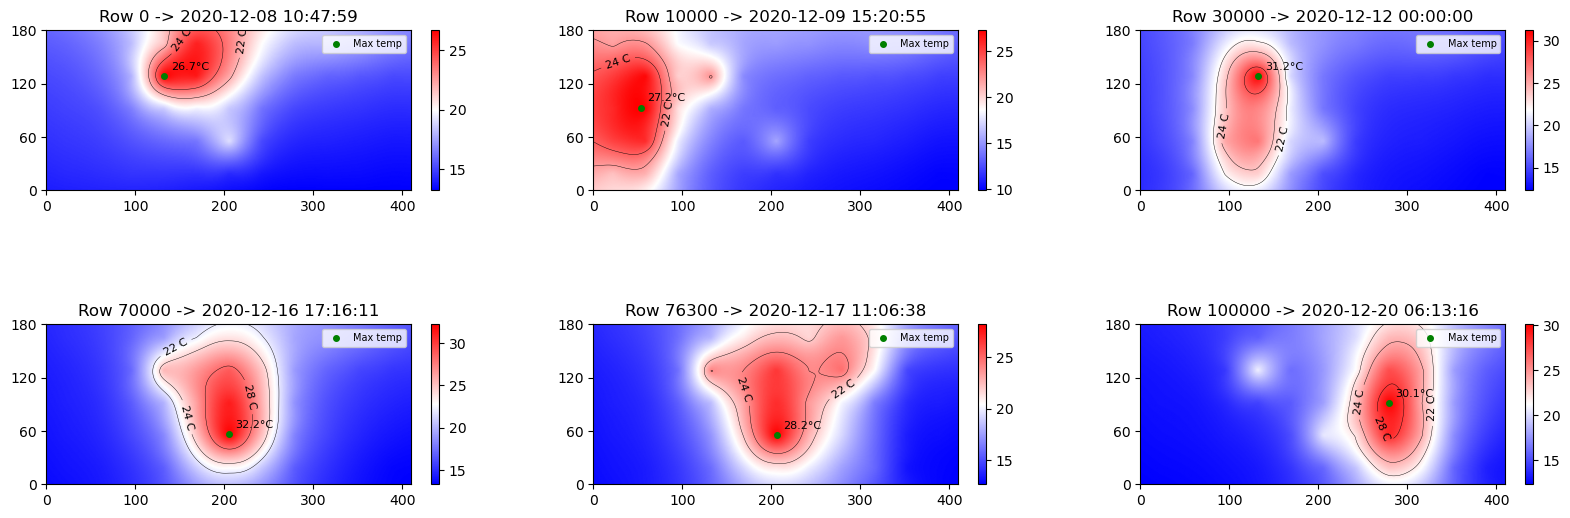

In [4]:
# Plotting data from december 2020 zigzag experiment 
file_path = '/Users/cyrilmonette/Library/CloudStorage/SynologyDrive-data/20.12_actuation_OH/Thermal meas/abc_heat_201208-104759--210128-094843-utc_zigzag.dat'

temperatures, _ = tu.readFromFile(file_path)

# Only keep data before 15th January 2021. NOTE: Why ?
temperatures = temperatures.loc[:'2021-01-15']
tu.preview(temperatures,show_sensors=False, contours=[22, 24, 28], rows=[0, 10000, 30000, 70000, 76300, 100000])

Previewing thermal data:
Max temp at 132, 55 for row 0 [tmax = 27.363240909971477 °C]
Max temp at 132, 19 for row 1735 [tmax = 24.14498956492564 °C]
Max temp at 132, 55 for row 3471 [tmax = 28.396942703350547 °C]
Max temp at 149, 82 for row 5206 [tmax = 33.88262709349722 °C]
Max temp at 169, 92 for row 6942 [tmax = 33.91337544249524 °C]
Max temp at 169, 91 for row 8678 [tmax = 34.15921872730052 °C]


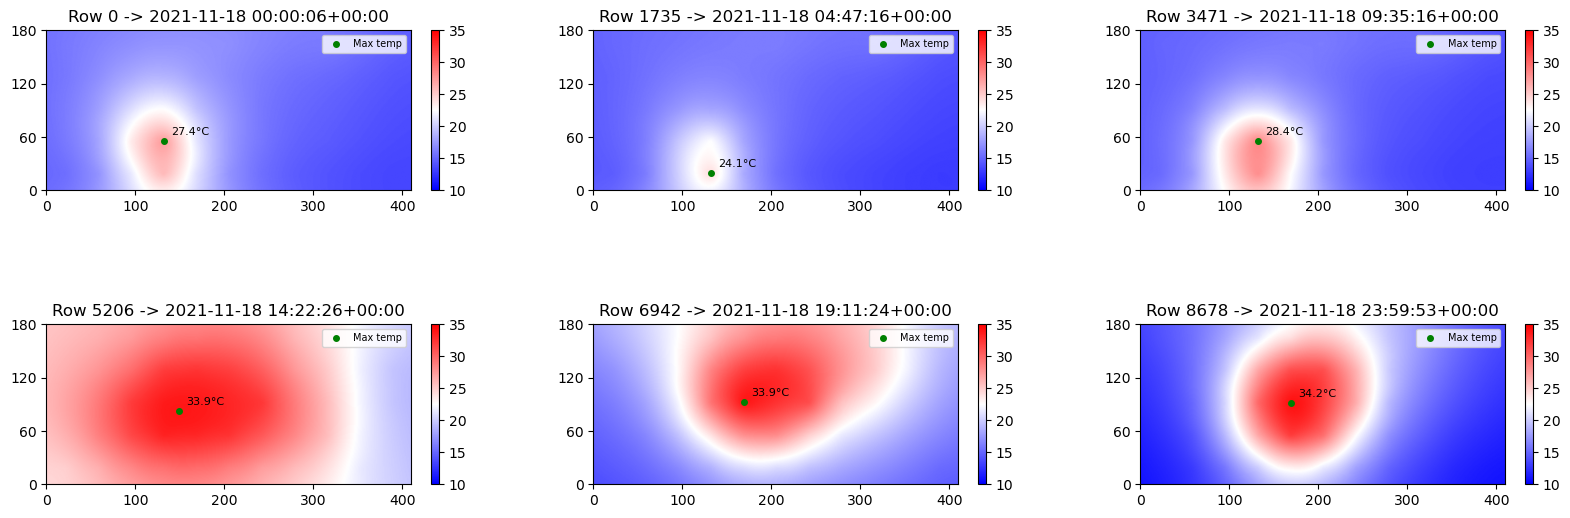

In [5]:
# Plotting data from 21-22 winter
file_path = "/Users/cyrilmonette/Library/CloudStorage/SynologyDrive-data/21.11-22.05_observation_OH/Thermal meas/h4r4/tmp/abc07_tmp_2021-11-18.csv"
temperatures, _ = tu.readFromFile(file_path, verbose=False)

#tu.preview(df, show_sensors=False,rows=[1000, 2000, 3000, 4000, 5000, 6000])
tu.preview(temperatures, show_sensors=False,vmin=10, vmax=35)

Previewing thermal data:
Max temp at 132, 128 for row 0 [tmax = 23.230733070274244 °C]
Max temp at 132, 128 for row 2143 [tmax = 31.74214932468227 °C]
Max temp at 132, 128 for row 4286 [tmax = 34.451926242397825 °C]
Max temp at 132, 128 for row 6429 [tmax = 30.02621158920202 °C]
Max temp at 132, 128 for row 8572 [tmax = 33.78880935107391 °C]
Max temp at 165, 134 for row 10716 [tmax = 26.727897298198478 °C]


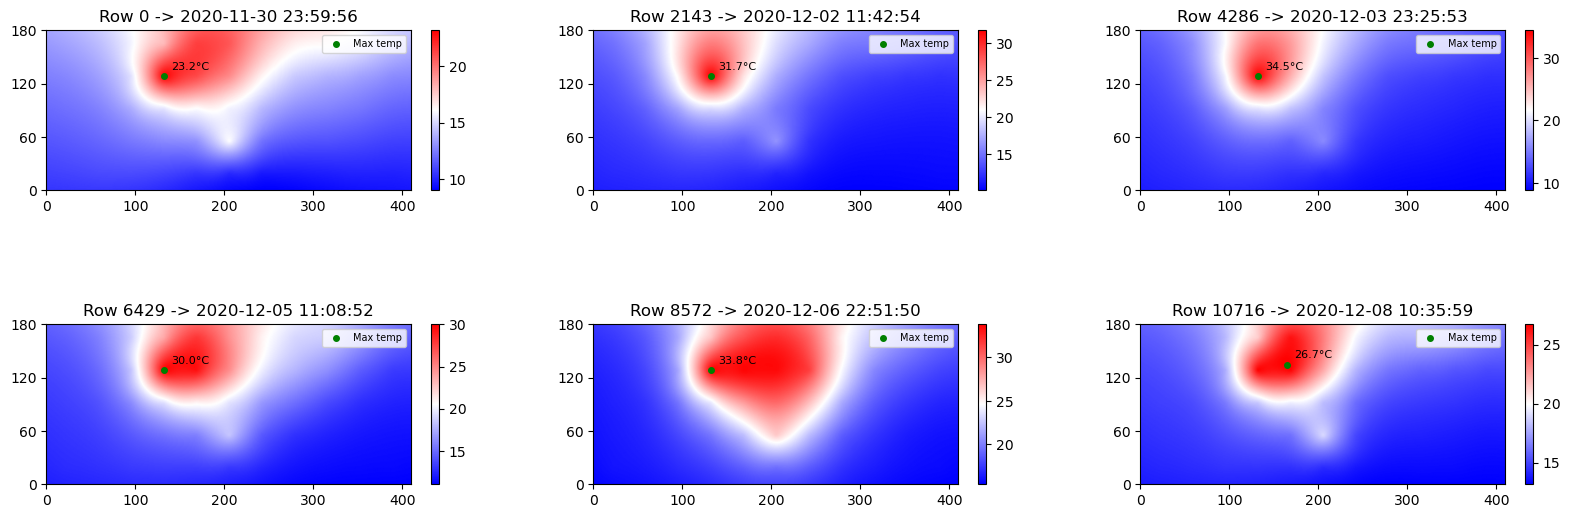

In [6]:
# Plotting data from 2020.12
file_path = "/Users/cyrilmonette/Library/CloudStorage/SynologyDrive-data/20.07-20.12_observation_OH/Thermal meas/brood_2020_12.dat"
temperatures, _ = tu.readFromFile(file_path, verbose=False)

#tu.preview(df, show_sensors=False, vmin=20, vmax=35)
tu.preview(temperatures, show_sensors=False)

Previewing thermal data:
Max temp at 316, 164 for row 1000 [tmax = 30.52845142913107 °C]
Max temp at 307, 180 for row 2000 [tmax = 32.58744906136189 °C]
Max temp at 312, 180 for row 3000 [tmax = 32.03834047169631 °C]
Max temp at 312, 180 for row 4000 [tmax = 31.490354959459125 °C]
Max temp at 300, 180 for row 5000 [tmax = 30.95888926640182 °C]
Max temp at 316, 180 for row 6000 [tmax = 32.34754805521683 °C]


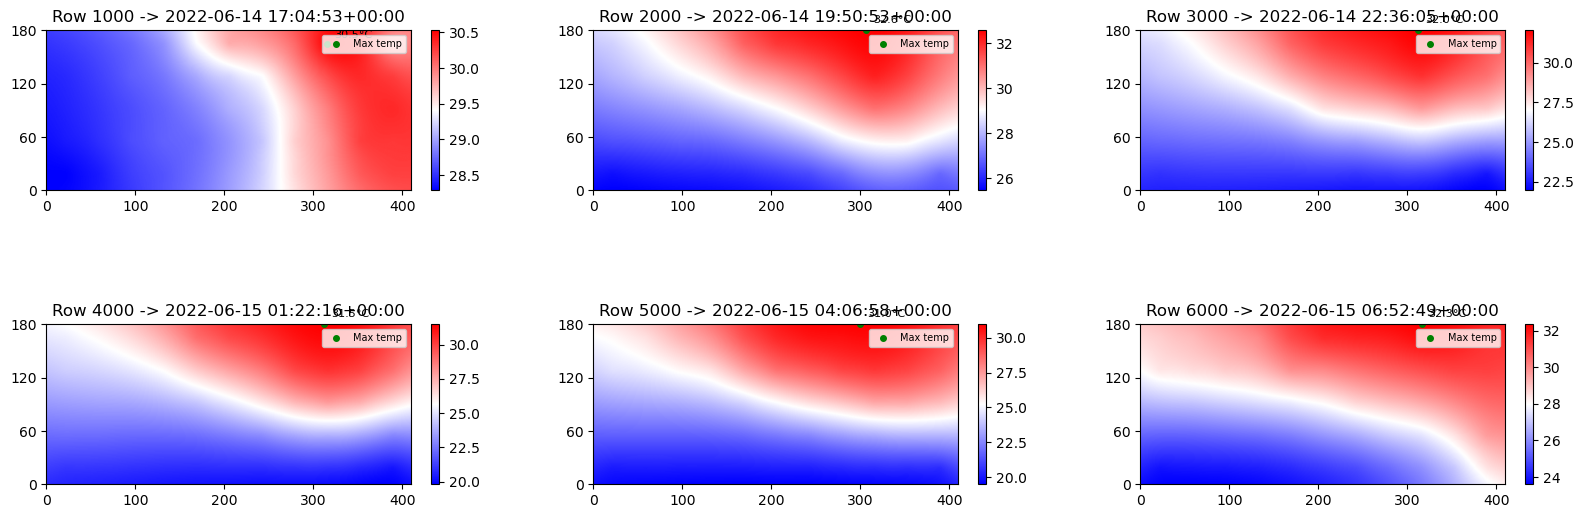

In [7]:
f_therm_data = "/Users/cyrilmonette/Library/CloudStorage/SynologyDrive-data/22.06-22.10_observation_BH/Thermal meas/sry/abc10_tmp_merged-2022.csv"
temperatures, _ = tu.readFromFile(f_therm_data, verbose=False)

tu.preview(temperatures, show_sensors=False, rows=[1000, 2000, 3000, 4000, 5000, 6000])


Previewing thermal data:
Max temp at 409, 1 for row 5000 [tmax = 30.67421585014929 °C]
Max temp at 116, 67 for row 7000 [tmax = 35.62093319886172 °C]
Max temp at 95, 54 for row 9000 [tmax = 35.79580629929529 °C]
Max temp at 95, 55 for row 11000 [tmax = 35.34160790603042 °C]
Max temp at 106, 72 for row 13920 [tmax = 35.31135032093668 °C]
Max temp at 132, 128 for row 30000 [tmax = 40.007312364498326 °C]


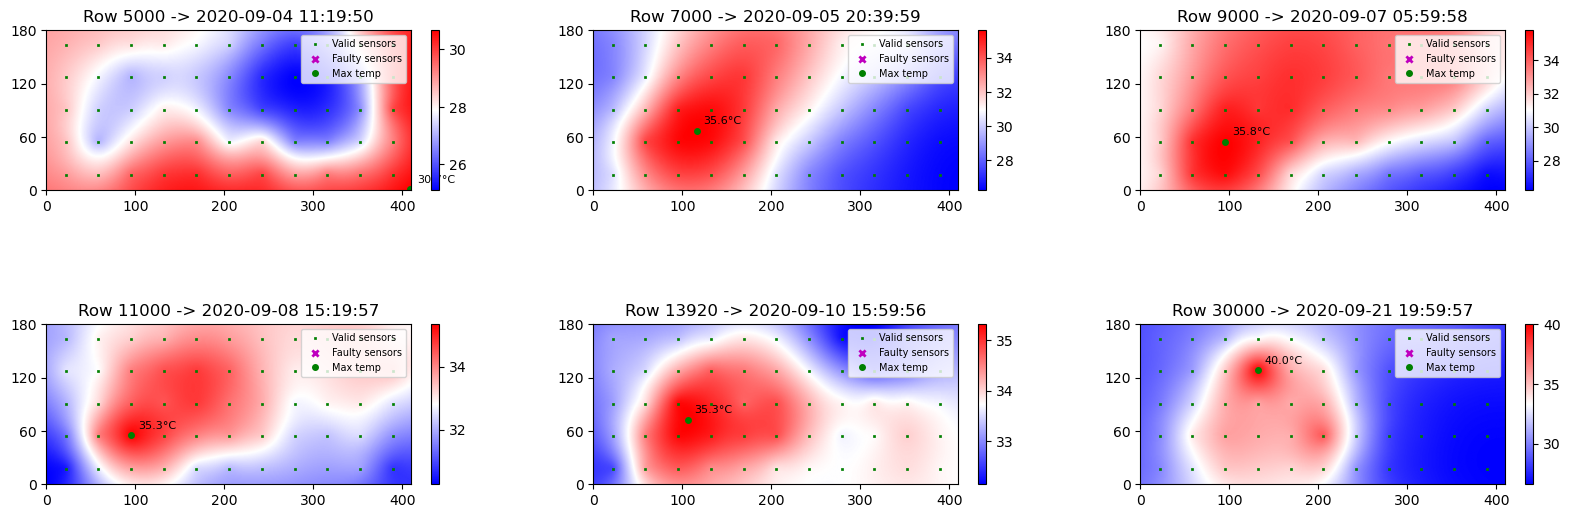

In [8]:
# Exploring the data from end of summer 2020
file_path = '/Users/cyrilmonette/Library/CloudStorage/SynologyDrive-data/20.07-20.12_observation_OH/Thermal meas/brood_2020_09.dat'
temperatures, _ = tu.readFromFile(file_path)

#tu.preview(df, show_sensors=False, vmin=20, vmax=35)
tu.preview(temperatures, show_sensors=True, rows=[5000, 7000, 9000, 11000, 13920, 30000])

## Robustness of interpolation to missing temperature values

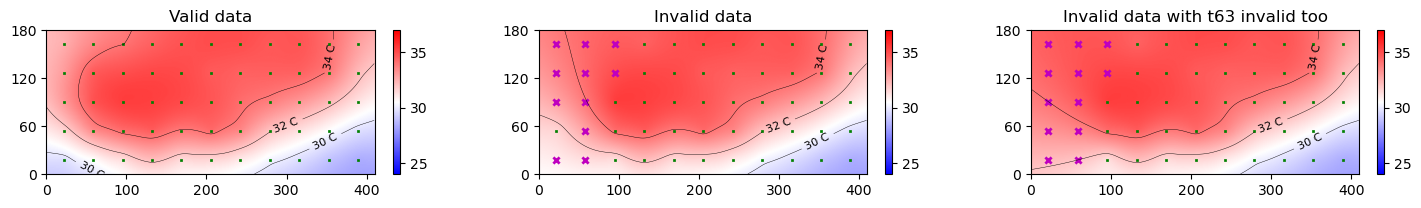

In [9]:
file_path = '/Users/cyrilmonette/Library/CloudStorage/SynologyDrive-data/22.06-22.10_observation_BH/Thermal meas/abc01/abc01_tmp_2022-06-28.csv'
_levels = [28, 30, 32, 34]

temperatures, _ = tu.readFromFile(file_path)

# For the same data, make two plots: one plot with t63 valid and one with t63 invalid (set it to -273.0):
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 7))
temps = temperatures.iloc[0].to_numpy()
# in the first subplot, plot the valid data
hive = tu.ThermalFrame(temperature_data=temps)
hive.plot_thermal_field(ax[0],show_cb=True, show_sensors=True, v_min=24,v_max=37,contours=_levels)
ax[0].set_title(f"Valid data")

# in the second subplot, plot the invalid data
temps[52:63] = -273.0
hive = tu.ThermalFrame(temperature_data=temps)
hive.plot_thermal_field(ax[1],show_cb=True, show_sensors=True, v_min=24,v_max=37,contours=_levels)
ax[1].set_title(f"Invalid data")

# in the second subplot, plot the invalid data
temps[52:64] = -273.0
hive = tu.ThermalFrame(temperature_data=temps)
hive.plot_thermal_field(ax[2],show_cb=True, show_sensors=True, v_min=24,v_max=37,contours=_levels)
ax[2].set_title(f"Invalid data with t63 invalid too")

plt.show()

## Plotting to try out the library's functionalities

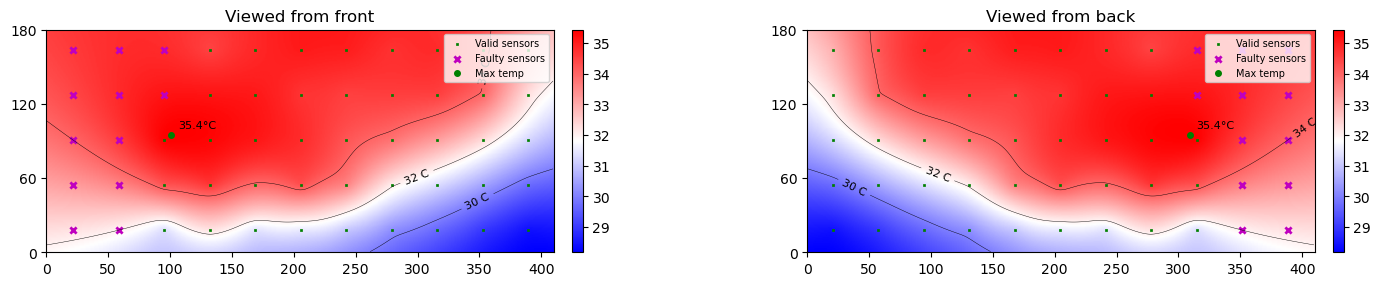

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
hive.plot_thermal_field(ax[0],show_cb=True, show_sensors=True, show_max_temp=True,contours=_levels, annotate_contours=True, viewed_from='front')
hive.plot_thermal_field(ax[1],show_cb=True, show_sensors=True, show_max_temp=True,contours=_levels, annotate_contours=True, viewed_from='back')
ax[0].set_title(f"Viewed from front")
ax[1].set_title(f"Viewed from back")
plt.show()

## Here we generate the contours in a way that is integrated in the ABCVisualisation library

Found 4 paths
Processing path 1/4
Processing path 2/4
Processing path 3/4
Processing path 4/4


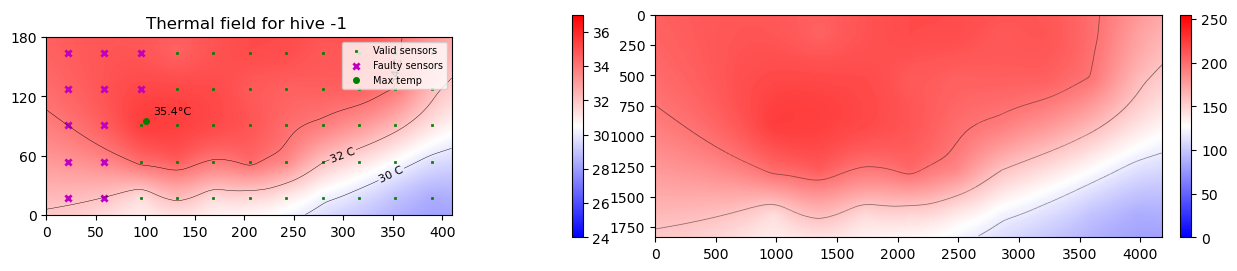

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
hive = tu.ThermalFrame(temperature_data=temps)
hive.plot_thermal_field(ax[0],show_cb=True, show_sensors=True, show_max_temp=True, v_min=24,v_max=37,contours=_levels)

# Example thermal field and normalization parameters
thermal_field = hive.thermal_field  # Original temperature data
v_min, v_max = 24, 37  # Define the temperature range

# Create the normalized field for matplotlib
norm_field = (thermal_field - v_min) / (v_max - v_min)
# Apply matplotlib colormap (e.g., 'bwr')
colormap = plt.colormaps['bwr']
overlay_colored = colormap(norm_field)  # Returns RGBA values in [0, 1]
# Scale to [0, 255] for OpenCV compatibility
overlay_rgb = (overlay_colored * 255).astype(np.uint8)
overlay_rgb[:,:,3] = int(180)

overlay_rgb = cv2.resize(overlay_rgb, (int(overlay_rgb.shape[1] * 10.2), int(overlay_rgb.shape[0] * 10.2)), interpolation=cv2.INTER_NEAREST)

# Generate the contours
contour = plt.contour(thermal_field, levels=_levels, colors='none')  # Only compute, no color

# Extract paths from the contour
paths = contour.get_paths()
print(f"Found {len(paths)} paths")

canvas = np.zeros_like(overlay_rgb[:,:,0])

# Draw each disjoint segment within each path
for i, path in enumerate(paths):
    print(f"Processing path {i+1}/{len(paths)}")
    
    # Get the vertices and codes
    vertices = path.vertices
    codes = path.codes

    # Initialize a list to store points for each disjoint segment
    segment_points = []
    if codes is None:
        continue
    
    for vert, code in zip(vertices, codes):
        if code == Path.MOVETO:
            # Start of a new segment: draw the previous segment if it exists
            if segment_points:
                # Scale and convert to integer pixel coordinates
                segment_points = np.array(segment_points)
                segment_points[:, 0] *= canvas.shape[1] / norm_field.shape[1]
                segment_points[:, 1] *= canvas.shape[0] / norm_field.shape[0]
                segment_points = np.round(segment_points).astype(np.int32)
                
                # Draw the segment as a polyline
                cv2.polylines(canvas, [segment_points], isClosed=False, color=255, thickness=2)
            
            # Start a new segment
            segment_points = [vert]
        elif code in (Path.LINETO, Path.CLOSEPOLY):
            # Continue the current segment
            segment_points.append(vert)
    
    # Draw the last segment if it exists
    if segment_points:
        segment_points = np.array(segment_points)
        segment_points[:, 0] *= canvas.shape[1] / norm_field.shape[1]
        segment_points[:, 1] *= canvas.shape[0] / norm_field.shape[0]
        segment_points = np.round(segment_points).astype(np.int32)
        cv2.polylines(canvas, [segment_points], isClosed=False, color=255, thickness=2)


# Overlay the contours onto your RGB overlay
overlay_with_contours = overlay_rgb.copy()
overlay_with_contours[canvas > 0] = (0, 0, 0, 255)  # Black contour

# Display or save the result
img = ax[1].imshow(cv2.cvtColor(overlay_with_contours, cv2.COLOR_RGBA2RGB),cmap=plt.get_cmap('bwr'))
cbar = plt.colorbar(img, ax=ax, orientation='vertical')
cbar.ax.set_position([ax[1].get_position().x1 + 0.01, ax[1].get_position().y0, 0.04, ax[1].get_position().height])  # Adjust position relative to ax
plt.show()